**Ojective**

Explore the Tweets text for descriptive analysis

Train supervised learning classifier using traditional ML algorithms

Steps:
1. Load Libraries and Dataset
2.Cleaning of Data
3.Data Visualisation & Creating Wordcloud image
4.Split Data in Train & Test 
5.Base Model Multinomial Naive Bayes 
6.HyperParameter Tunning
7.Prediction of Test Data
8.Creating Submission CSV for final submission

**Import Libraries**

In [109]:
# To read and process data
import numpy as np
import pandas as pd

#Image Plotting
import matplotlib.pyplot as plt
%matplotlib inline

#Library for building wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Sklearn 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer


In [110]:
train_data=pd.read_csv("/content/train.csv")
print(f"Shape of Train Dataset-->{train_data.shape}")

Shape of Train Dataset-->(7613, 5)


In [111]:
train_data.sample(2)

,id,keyword,location,text,target
5760,8221,riot,"Montana, USA",I liked a @YouTube video http://t.co/lAmsdzKCu...,0
2916,4189,drown,"Layang-Layang, Perak",Drown by Bring Me the Horizon (at Information ...,0


**2. Data  Cleaning**

In [112]:
# Dopping blank Columns
train_data.dropna(subset=['text','target'],inplace=True)
print(f"Shape of Train Dataset-->{train_data.shape}")


Shape of Train Dataset-->(7613, 5)


Observation : No null Value found

**3.Data Visualisation**

<AxesSubplot:>

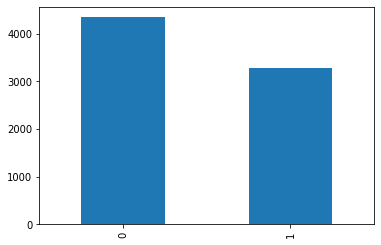

In [113]:
# plotting graph for target variable
train_data['target'].value_counts().plot(kind="bar")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '# of tweets')

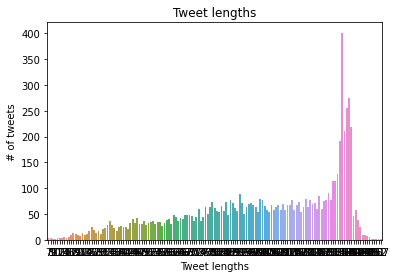

In [114]:
#Plotting Graph for Text length
import seaborn as sns
tweet_lengths = list(map(len, train_data.text))
sns.countplot(tweet_lengths)
plt.title('Tweet lengths')
plt.xlabel('Tweet lengths')
plt.ylabel('# of tweets')

**Building wordcloud**


In [115]:
#Library for building wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [116]:
heading_1=train_data[train_data['target']==1]["text"]
collapsed_heading_1=heading_1.str.cat(sep=' ')

heading_0=train_data[train_data['target']==0]["text"]
collapsed_heading_0=heading_0.str.cat(sep=' ')

**Create stopword list:**

In [117]:
stopwords = set(STOPWORDS)
stopwords.update(["https","t","tu","via"])
print("Word Cloud for Disaster Related Tweets")

Word Cloud for Disaster Related Tweets


Word Cloud for tweet is About a Real Disaster Tweets


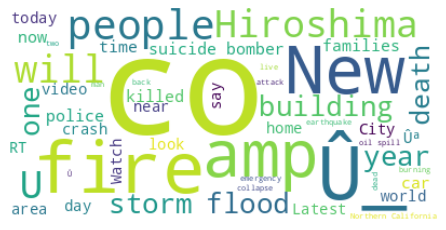

Word Cloud for Tweet is NOT About a Real Disaster Tweets


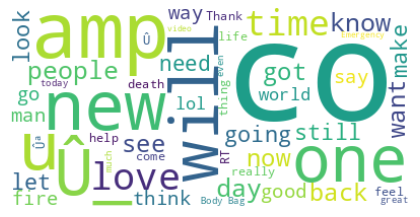

In [118]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_heading_1  )
# Display the generated image:
# the matplotlib way:1
print("Word Cloud for tweet is About a Real Disaster Tweets")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()



# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_heading_0)
# Display the generated image:
# the matplotlib way:1
print("Word Cloud for Tweet is NOT About a Real Disaster Tweets")
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad = 0)
plt.axis("off")
plt.show()

**4.Split training and test set**

In [119]:
print(f"Frequency of Target Variable:\n{train_data['target'].value_counts()}")

Frequency of Target Variable:
0    4342
1    3271
Name: target, dtype: int64


In [120]:
X_train,X_test,y_train,y_test=train_test_split(train_data['text'],train_data['target'],test_size=0.1,random_state=42)

print(X_train.shape),print(X_test.shape),print(y_train.shape)

(6851,)
(762,)
(6851,)


(None, None, None)

**5.Train Base Model Naive Base Machine Classifier Model:**

**Introduction**

Naive Bayes is a classification technique based on the Bayes theorem. It is a simple but powerful algorithm for predictive modeling under supervised learning algorithms. The technique behind Naive Bayes is easy to understand. Naive Bayes has higher accuracy and speed when we have large data points.

**There are three types of Naive Bayes models: Gaussian, Multinomial, and Bernoulli.**

Gaussian Naive Bayes - This is a variant of Naive Bayes which supports continuous values and has an assumption that each class is normally distributed.

Multinomial Naive Bayes - This is another variant which is an event-based model that has features as vectors where sample(feature) represents frequencies with which certain events have occurred.

Bernoulli - This variant is also event-based where features are independent boolean which are in binary form.

In [121]:
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
    ])

In [122]:
model=clf.fit(X_train,y_train)
model.score(X_test,y_test)

0.7782152230971129

In [123]:
print("Accuracy of MultiNomial Machine Classifier is {}".format(model.score(X_test,y_test)))

Accuracy of MultiNomial Machine Classifier is 0.7782152230971129


**6.Hyper Parameter Tunning**

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
parameters = {
...     'vect__ngram_range': [(1, 1), (1, 2),(1,3)],
...     'classifier__fit_prior':[True,False],
... }

In [126]:
grid_Search = GridSearchCV(clf, parameters,cv=3,verbose=1,n_jobs=-1)
grid_Search.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(stop_words='english')),
                                       ('tfidf', TfidfTransformer()),
                                       ('classifier', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'classifier__fit_prior': [True, False],
                         'vect__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             verbose=1)

In [127]:
print("Accuracy of Prediction In test data {}".format(grid_Search.score(X_test,y_test)))
print(f"Bast Parameter of GridSerch:{grid_Search.best_params_}")

Accuracy of Prediction In test data 0.7703412073490814
Bast Parameter of GridSerch:{'classifier__fit_prior': True, 'vect__ngram_range': (1, 2)}


**Observation : Accuracy with HyperTunning was not increase much.
So we try to predict with base model**

**7. Prediction of Test_CSV**

Loading Test Data

In [66]:
test_data=pd.read_csv("/content/test.csv")
print(f"Shape of Train Dataset-->{test_data.shape}")

Shape of Train Dataset-->(3263, 4)


In [68]:
test_data.head(2)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."


In [71]:
y_pred=model.predict(test_data.text)
y_pred[:10]

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0])

**8. Creating Submission CSV**

In [88]:
data={"ID":test_data.id,"Target":y_pred}
data=pd.DataFrame(data)
data.set_index("ID",inplace=True)
data

,Target
ID,
0,0
2,1
3,1
9,1
11,1
...,...
10861,1
10865,1
10868,1


In [89]:
submission=data.to_csv("submission_vl1")

Download submission and submitted on Kaggle Competition🌝
: 